In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.colors
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [7]:
Data_Root = '/kellogg/proj/hpk5609/Promotion/revision/reg_results_F_M/'

In [3]:
gens = ['Male', 'Female']
labels = ['Man', 'Woman']

In [4]:
colors = sns.color_palette()[:len(labels)]

## Adjusted prediction of self-promotion rate

### One big model for all years

Overall gender gap

In [125]:
df = pd.read_csv(Data_Root + 'pred_all_tweet.csv', header=0)

In [126]:
df

,x,predicted,std.error,conf.low,conf.high,group
0,Male,0.024622,0.008717,0.024215,0.025035,2013
1,Male,0.033107,0.007680,0.032629,0.033592,2014
2,Male,0.044248,0.006907,0.043679,0.044824,2015
3,Male,0.055566,0.006459,0.054906,0.056234,2016
4,Male,0.075759,0.006070,0.074930,0.076596,2017
5,Male,0.105505,0.005705,0.104455,0.106565,2018
6,Female,0.017508,0.009086,0.017205,0.017817,2013
7,Female,0.023601,0.008080,0.023239,0.023969,2014
8,Female,0.031649,0.007327,0.031211,0.032092,2015
9,Female,0.039878,0.006888,0.039364,0.040398,2016


In [127]:
a = np.array(df.loc[df['x']=='Male', 'predicted'].tolist())

In [128]:
b = np.array(df.loc[df['x']=='Female', 'predicted'].tolist())

In [129]:
(a-b)/b

array([0.40629254, 0.40275797, 0.3981171 , 0.39340262, 0.38499141,
       0.37260063])

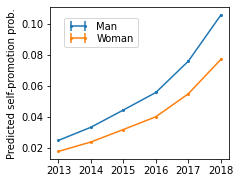

In [132]:
nrows = 1
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3.2, 2.8))

for i, lab, gender, color in zip(range(len(labels)), labels, gens, colors):
    xs = np.array(df.loc[df['x']==gender, 'group'].tolist())
    # xs = xs + 0.3 * (i-3)
    ys = np.array(df.loc[df['x']==gender, 'predicted'].tolist())
    lows = ys - np.array(df.loc[df['x']==gender, 'conf.low'].tolist())
    upps = np.array(df.loc[df['x']==gender, 'conf.high'].tolist()) - ys
    errors = np.array([lows, upps])
    ax.errorbar(xs, ys, yerr=errors, color=color, alpha=1, fmt='-o', markersize=2, linewidth=1.5, label=lab)
    
# ax.legend(bbox_to_anchor=(1, -0.03), loc='lower left', labelspacing = 1.05, frameon = True)
legend = ax.legend(bbox_to_anchor=(0.05, 0.7), loc='lower left', numpoints=2, labelspacing = 0.15, shadow=False, frameon = True, markerscale = 1)
# ax.margins(0,0)
# ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.set_xticks([2013, 2014, 2015, 2016, 2017, 2018])
# ax.set_xlabel('Publication year')
ax.set_ylabel('Predicted self-promotion prob.')

# plt.tight_layout()
plt.show()
fig.savefig('./gender_year.pdf', bbox_inches='tight', pad_inches=0.01)


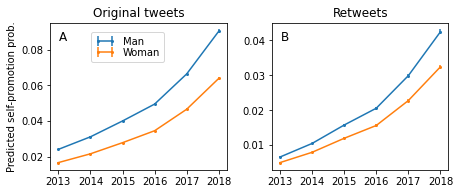

In [179]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6.5, 2.8))

files = ['pred_original.csv', 'pred_retweet.csv']

for j, ax in enumerate(axes):
    df = pd.read_csv(Data_Root + files[j], header=0)        
    for i, lab, gender, color in zip(range(len(labels)), labels, gens, colors):
        xs = np.array(df.loc[df['x']==gender, 'group'].tolist())
        ys = np.array(df.loc[df['x']==gender, 'predicted'].tolist())
        lows = ys - np.array(df.loc[df['x']==gender, 'conf.low'].tolist())
        upps = np.array(df.loc[df['x']==gender, 'conf.high'].tolist()) - ys
        errors = np.array([lows, upps])
        ax.errorbar(xs, ys, yerr=errors, color=color, alpha=1, fmt='-o', markersize=2, linewidth=1.5, label=lab)
        ax.set_xticks([2013, 2014, 2015, 2016, 2017, 2018])
    sub = 'A'
    if j == 1:
        sub = 'B'
    ax.text(0.05, 0.95, sub, fontsize=12, ha='left', va='top', transform=ax.transAxes)
    
legend = axes[0].legend(bbox_to_anchor=(0.2, 0.7), loc='lower left', numpoints=2, labelspacing = 0.15, shadow=False, frameon = True, markerscale = 1)
# ax.margins(0,0)
# ax.set_yticks([0.2, 0.4, 0.6, 0.8])
# ax.set_ylim([0.12, 0.22])
# ax.set_xticklabels(list(range(1, 11)))
axes[0].set_title('Original tweets')
axes[1].set_title('Retweets')
axes[0].set_ylabel('Predicted self-promotion prob.')

# fig.text(0.5, -0.01, 'Journal Impact Factor', ha='center')
plt.tight_layout()
plt.show()
fig.savefig('./gender_year_or_re.pdf', bbox_inches='tight', pad_inches=0.01)


#### Three panels

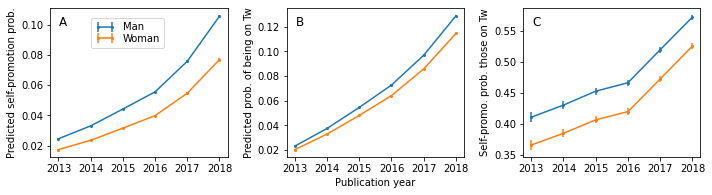

In [142]:
nrows = 1
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 2.8))

files = ['pred_all_tweet.csv', 'pred_gender_on_tw.csv', 'pred_on_tweet_subset.csv']
subs = ['A', 'B', 'C']

for j, ax in enumerate(axes):
    df = pd.read_csv(Data_Root + files[j], header=0)
    for i, lab, gender, color in zip(range(len(labels)), labels, gens, colors):
        xs = np.array(df.loc[df['x']==gender, 'group'].tolist())
        ys = np.array(df.loc[df['x']==gender, 'predicted'].tolist())
        lows = ys - np.array(df.loc[df['x']==gender, 'conf.low'].tolist())
        upps = np.array(df.loc[df['x']==gender, 'conf.high'].tolist()) - ys
        errors = np.array([lows, upps])
        ax.errorbar(xs, ys, yerr=errors, color=color, alpha=1, fmt='-o', markersize=2, linewidth=1.5, label=lab)
        ax.set_xticks([2013, 2014, 2015, 2016, 2017, 2018])
    ax.text(0.05, 0.95, subs[j], fontsize=12, ha='left', va='top', transform=ax.transAxes)
        
legend = axes[0].legend(bbox_to_anchor=(0.2, 0.7), loc='lower left', numpoints=2, labelspacing = 0.15, shadow=False, frameon = True, markerscale = 1)
# ax.margins(0,0)
# ax.set_yticks([0.2, 0.4, 0.6, 0.8])
# ax.set_ylim([0.12, 0.22])
# ax.set_xticklabels(list(range(1, 11)))

axes[1].set_xlabel('Publication year')
axes[0].set_ylabel('Predicted self-promotion prob.')
axes[1].set_ylabel('Predicted prob. of being on Tw')
axes[2].set_ylabel('Self-promo. prob. those on Tw')

# fig.text(0.5, -0.01, 'Journal Impact Factor', ha='center')
plt.tight_layout()
plt.show()
fig.savefig('./fig_2.pdf', bbox_inches='tight', pad_inches=0.01)


#### JIF (all years)

Their matching

Overall gender gap

In [148]:
df = pd.read_csv(Data_Root + 'gender_jif_1.csv', header=0)

In [149]:
df

,x,predicted,std.error,conf.low,conf.high,group
0,0,0.044251,0.005161,0.043825,0.044681,Male
1,0,0.033987,0.005951,0.033606,0.034372,Female
2,5,0.052578,0.004831,0.052108,0.053052,Male
3,5,0.038441,0.005414,0.038051,0.038836,Female
4,10,0.062370,0.004968,0.061803,0.062942,Male
5,10,0.043453,0.005612,0.042998,0.043913,Female
6,15,0.073843,0.005539,0.073104,0.074589,Male
7,15,0.049085,0.006477,0.048496,0.049681,Female
8,20,0.087231,0.006428,0.086233,0.088239,Male
9,20,0.055404,0.007790,0.054611,0.056209,Female


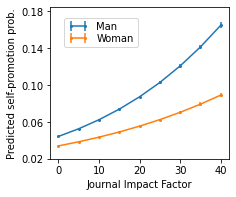

In [150]:
nrows = 1
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3.2, 2.8))

for i, lab, gender, color in zip(range(len(labels)), labels, gens, colors):
    xs = np.array(df.loc[df.group==gender, 'x'].tolist())
    # xs = xs + 0.3 * (i-3)
    ys = np.array(df.loc[df.group==gender, 'predicted'].tolist())
    lows = ys - np.array(df.loc[df.group==gender, 'conf.low'].tolist())
    upps = np.array(df.loc[df.group==gender, 'conf.high'].tolist()) - ys
    errors = np.array([lows, upps])
    ax.errorbar(xs, ys, yerr=errors, color=color, alpha=1, fmt='-o', markersize=2, linewidth=1.5, label=lab)
    
# ax.legend(bbox_to_anchor=(1, -0.03), loc='lower left', labelspacing = 1.05, frameon = True)
legend = ax.legend(bbox_to_anchor=(0.05, 0.7), loc='lower left', numpoints=2, labelspacing = 0.15, shadow=False, frameon = True, markerscale = 1)
# ax.margins(0,0)
ax.set_yticks([0.02, 0.06, 0.10, 0.14, 0.18])
ax.set_ylim([0.02, 0.185])
# ax.set_xticks([2013, 2014, 2015, 2016, 2017, 2018])
ax.set_ylabel('Predicted self-promotion prob.')
ax.set_xlabel('Journal Impact Factor')

# plt.tight_layout()
plt.show()
fig.savefig('./gender_jif_1.pdf', bbox_inches='tight', pad_inches=0.01)


#### Affiliation rank (all years)

Their matching

Overall gender gap

In [153]:
df = pd.read_csv(Data_Root + 'gender_affi_1.csv', header=0)

In [154]:
df

,x,predicted,std.error,conf.low,conf.high,group
0,0,0.060638,0.005771,0.059997,0.061285,Male
1,0,0.043221,0.006970,0.042660,0.043789,Female
2,1,0.057952,0.005390,0.057378,0.058531,Male
3,1,0.041360,0.006320,0.040872,0.041854,Female
4,2,0.055377,0.005101,0.054857,0.055903,Male
5,2,0.039576,0.005821,0.039144,0.040011,Female
6,3,0.052911,0.004922,0.052430,0.053396,Male
7,3,0.037865,0.005514,0.037473,0.038261,Female
8,4,0.050549,0.004864,0.050093,0.051008,Male
9,4,0.036226,0.005433,0.035856,0.036599,Female


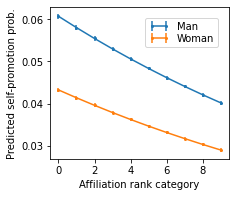

In [155]:
nrows = 1
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3.2, 2.8))

for i, lab, gender, color in zip(range(len(labels)), labels, gens, colors):
    xs = np.array(df.loc[df.group==gender, 'x'].tolist())
    # xs = xs + 0.3 * (i-3)
    ys = np.array(df.loc[df.group==gender, 'predicted'].tolist())
    lows = ys - np.array(df.loc[df.group==gender, 'conf.low'].tolist())
    upps = np.array(df.loc[df.group==gender, 'conf.high'].tolist()) - ys
    errors = np.array([lows, upps])
    ax.errorbar(xs, ys, yerr=errors, color=color, alpha=1, fmt='-o', markersize=2, linewidth=1.5, label=lab)
    
# ax.legend(bbox_to_anchor=(1, -0.03), loc='lower left', labelspacing = 1.05, frameon = True)
legend = ax.legend(bbox_to_anchor=(0.5, 0.7), loc='lower left', numpoints=2, labelspacing = 0.15, shadow=False, frameon = True, markerscale = 1)
# ax.margins(0,0)
# ax.set_yticks([0.2, 0.4, 0.6, 0.8])
# ax.set_xticks([2013, 2014, 2015, 2016, 2017, 2018])
ax.set_ylabel('Predicted self-promotion prob.')
ax.set_xlabel('Affiliation rank category')

# plt.tight_layout()
plt.show()
fig.savefig('./gender_affi_1.pdf', bbox_inches='tight', pad_inches=0.01)


#### Previous num. publications (all years)

Their matching

Overall gender gap

In [161]:
df = pd.read_csv(Data_Root + 'gender_pub_1.csv', header=0)

In [162]:
df

,x,predicted,std.error,conf.low,conf.high,group
0,0,0.021440,0.012278,0.020940,0.021950,Male
1,0,0.014326,0.013591,0.013955,0.014707,Female
2,1,0.027542,0.009569,0.027044,0.028048,Male
3,1,0.018798,0.010200,0.018433,0.019170,Female
4,2,0.033984,0.007546,0.033502,0.034473,Male
5,2,0.023633,0.007987,0.023274,0.023997,Female
6,3,0.040298,0.006178,0.039832,0.040769,Male
7,3,0.028475,0.006784,0.028109,0.028845,Female
8,4,0.045947,0.005368,0.045488,0.046410,Male
9,4,0.032898,0.006208,0.032513,0.033287,Female


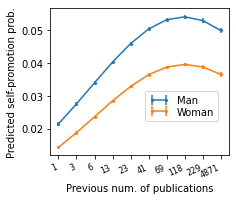

In [163]:
nrows = 1
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3.2, 2.7))

for i, lab, gender, color in zip(range(len(labels)), labels, gens, colors):
    xs = np.array(df.loc[df.group==gender, 'x'].tolist())
    # xs = xs + 0.3 * (i-3)
    ys = np.array(df.loc[df.group==gender, 'predicted'].tolist())
    lows = ys - np.array(df.loc[df.group==gender, 'conf.low'].tolist())
    upps = np.array(df.loc[df.group==gender, 'conf.high'].tolist()) - ys
    errors = np.array([lows, upps])
    ax.errorbar(xs, ys, yerr=errors, color=color, alpha=1, fmt='-o', markersize=2, linewidth=1.5, label=lab)
    
# ax.legend(bbox_to_anchor=(1, -0.03), loc='lower left', labelspacing = 1.05, frameon = True)
legend = ax.legend(bbox_to_anchor=(0.5, 0.2), loc='lower left', numpoints=2, labelspacing = 0.15, shadow=False, frameon = True, markerscale = 1)
ax.set_xticks(xs)
ax.set_xticklabels([1, 3, 6, 13, 23, 41, 69, 118, 229, 4871])
for tick in ax.get_xticklabels():
    tick.set_ha('right')
    tick.set_fontsize(8)
    tick.set_rotation(25)
ax.set_ylabel('Predicted self-promotion prob.')
ax.set_xlabel('Previous num. of publications')

# plt.tight_layout()
plt.show()
fig.savefig('./gender_pub_1.pdf', bbox_inches='tight', pad_inches=0.01)


#### Discipline (all years)

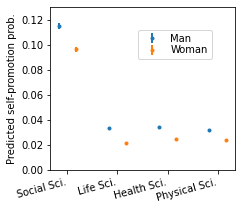

In [167]:
name_map = {'social': 'Social Sci.',
            'life': 'Life Sci.',
            'health': 'Health Sci.',
            'phy': 'Physical Sci.'}

step = 3
ys_1 = 1 + np.arange(4) * step
ys_2 = 2 + np.arange(4) * step
y_pos = 1.5 + np.arange(4) * step

nrows = 1
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3.3, 3))

for i, lab, gender, color, ys in zip(range(len(labels)), labels, gens, colors, [ys_1, ys_2]):
    xs = []
    xs_low = []
    xs_hi = []
    for j, fname in enumerate(name_map.keys()):
        df = pd.read_csv(Data_Root + 'pred_%s_1.csv'%fname, header=0)
        a, b, c = df.loc[df.x==gender][['predicted', 'conf.low', 'conf.high']].values[0]
        xs.append(a)
        xs_low.append(b)
        xs_hi.append(c)
    errors = np.array([np.array(xs) - np.array(xs_low), np.array(xs_hi) - np.array(xs)])
    ax.errorbar(ys, xs, yerr=errors, color=color, alpha=1, fmt='o', markersize=3, linewidth=2, label=lab)
    
legend = ax.legend(bbox_to_anchor=(0.45, 0.65), loc='lower left', numpoints=1, labelspacing = 0.15, shadow=False, frameon = True, markerscale = 1)
ax.set_ylabel('Predicted self-promotion prob.')

ax.set_ylim([0, 0.13])
# ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3])
ax.set_xticks(y_pos)
ax.set_xticklabels([name_map[disc] for disc in name_map], rotation=15, ha='right')
# plt.tight_layout()
plt.show()
fig.savefig('./gender_disc_1.pdf', bbox_inches='tight', pad_inches=0.01)


On Twitter subset

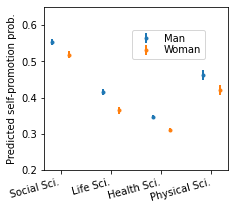

In [168]:
name_map = {'social': 'Social Sci.',
            'life': 'Life Sci.',
            'health': 'Health Sci.',
            'phy': 'Physical Sci.'}

step = 3
ys_1 = 1 + np.arange(4) * step
ys_2 = 2 + np.arange(4) * step
y_pos = 1.5 + np.arange(4) * step

nrows = 1
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3.3, 3))

for i, lab, gender, color, ys in zip(range(len(labels)), labels, gens, colors, [ys_1, ys_2]):
    xs = []
    xs_low = []
    xs_hi = []
    for j, fname in enumerate(name_map.keys()):
        df = pd.read_csv(Data_Root + 'pred_%s.csv'%fname, header=0)
        a, b, c = df.loc[df.x==gender][['predicted', 'conf.low', 'conf.high']].values[0]
        xs.append(a)
        xs_low.append(b)
        xs_hi.append(c)
    errors = np.array([np.array(xs) - np.array(xs_low), np.array(xs_hi) - np.array(xs)])
    ax.errorbar(ys, xs, yerr=errors, color=color, alpha=1, fmt='o', markersize=3, linewidth=2, label=lab)
    
legend = ax.legend(bbox_to_anchor=(0.45, 0.65), loc='lower left', numpoints=1, labelspacing = 0.15, shadow=False, frameon = True, markerscale = 1)
ax.set_ylabel('Predicted self-promotion prob.')

ax.set_ylim([0.2, 0.65])
# ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3])
ax.set_xticks(y_pos)
ax.set_xticklabels([name_map[disc] for disc in name_map], rotation=15, ha='right')
# plt.tight_layout()
plt.show()
fig.savefig('./gender_disc_3.pdf', bbox_inches='tight', pad_inches=0.01)


## Adjusted prediction of return on self-promotion (active observations)

### One big model for all years

Their matching

In [11]:
df_ = pd.read_csv(Data_Root + 'gender_return_on_self_promotion_active_sub.csv', header=0)

In [12]:
df_

,x,predicted,std.error,conf.low,conf.high,group,facet
0,False,4.315860,0.009846,4.233373,4.399955,Male,2013
1,False,5.478465,0.007727,5.396118,5.562069,Male,2014
2,False,6.433645,0.006592,6.351053,6.517312,Male,2015
3,False,7.339296,0.006000,7.253494,7.426114,Male,2016
4,False,9.577959,0.005633,9.472799,9.684285,Male,2017
5,False,10.873623,0.005405,10.759036,10.989431,Male,2018
6,False,5.006716,0.010460,4.905113,5.110424,Female,2013
7,False,6.355423,0.008447,6.251064,6.461525,Female,2014
8,False,7.463503,0.007374,7.356414,7.572151,Female,2015
9,False,8.514125,0.006797,8.401449,8.628313,Female,2016


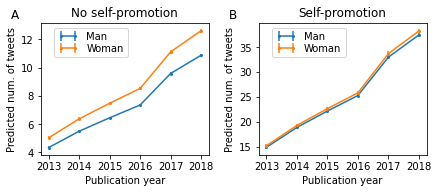

In [13]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6.2, 2.8))

xs = list(range(2013, 2019))

for j, cond, sub in zip([0, 1], [False, True], ['A', 'B']):
    ax = axes[j]
    for i, lab, gender, color in zip(range(len(labels)), labels, gens, colors):
        ys, lows, upps = [], [], []
        # df_ = pd.read_csv(Data_Root + 'gender_return_on_self_promotion_active_sub.csv', header=0)
        ys = df_.loc[(df_['x'] == cond) & (df_['group'] == gender), 'predicted'].values
        lows = df_.loc[(df_['x'] == cond) & (df_['group'] == gender), 'conf.low'].values
        upps = df_.loc[(df_['x'] == cond) & (df_['group'] == gender), 'conf.high'].values
        lows = ys - lows
        upps = upps - ys
        errors = np.array([lows, upps])
        ax.errorbar(xs, ys, yerr=errors, color=color, alpha=1, fmt='-o', markersize=2, linewidth=1.5, label=lab)
    legend = ax.legend(bbox_to_anchor=(0.05, 0.7), loc='lower left', numpoints=2, labelspacing = 0.15, shadow=False, frameon = True, markerscale = 1)
    # ax.margins(0,0)
    # ax.set_yticks([0.2, 0.4, 0.6, 0.8])
    ax.set_xticks([2013, 2014, 2015, 2016, 2017, 2018])
    ax.set_xlabel('Publication year')
    ax.set_ylabel('Predicted num. of tweets')
    ax.text(-0.18, 1.11, sub, fontsize=12, ha='left', va='top', transform=ax.transAxes)
axes[0].set_title('No self-promotion')
axes[1].set_title('Self-promotion')

plt.tight_layout()
plt.show()
# fig.savefig('./gender_return_active_sub.pdf', bbox_inches='tight', pad_inches=0.01)
fig.savefig('./fig_4.pdf', bbox_inches='tight', pad_inches=0.01)


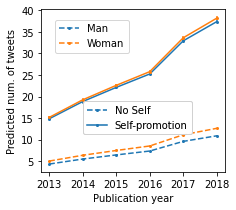

In [21]:
nrows = 1
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3.3, 3))

xs = list(range(2013, 2019))

for j, cond, mk in zip([0, 1], [False, True], ['--o', '-o']):
    for i, gender, color in zip(range(len(labels)), gens, colors):
        ys, lows, upps = [], [], []
        # df_ = pd.read_csv(Data_Root + 'gender_return_on_self_promotion_active_sub.csv', header=0)
        ys = df_.loc[(df_['x'] == cond) & (df_['group'] == gender), 'predicted'].values
        lows = df_.loc[(df_['x'] == cond) & (df_['group'] == gender), 'conf.low'].values
        upps = df_.loc[(df_['x'] == cond) & (df_['group'] == gender), 'conf.high'].values
        lows = ys - lows
        upps = upps - ys
        errors = np.array([lows, upps])
        ax.errorbar(xs, ys, yerr=errors, color=color, alpha=1, fmt=mk, markersize=2, linewidth=1.5)
    # legend = ax.legend(bbox_to_anchor=(0.05, 0.7), loc='lower left', numpoints=2, labelspacing = 0.15, shadow=False, frameon = True, markerscale = 1)
    # ax.margins(0,0)
    # ax.set_yticks([0.2, 0.4, 0.6, 0.8])
    ax.set_xticks([2013, 2014, 2015, 2016, 2017, 2018])
    ax.set_xlabel('Publication year')
    ax.set_ylabel('Predicted num. of tweets')
    # ax.text(-0.18, 1.11, sub, fontsize=12, ha='left', va='top', transform=ax.transAxes)
# axes[0].set_title('No self-promotion')
# axes[1].set_title('Self-promotion')

# In total 2x2 lines have been plotted
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0,1]], labels, bbox_to_anchor=(0.05, 0.7), loc='lower left')
legend2 = plt.legend([lines[i] for i in [0,2]], ['No Self', 'Self-promotion'], bbox_to_anchor=(0.2, 0.2), loc='lower left')
ax.add_artist(legend1)
ax.add_artist(legend2)


# plt.tight_layout()
plt.show()
# fig.savefig('./gender_return_active_sub.pdf', bbox_inches='tight', pad_inches=0.01)
fig.savefig('./fig_4.pdf', bbox_inches='tight', pad_inches=0.01)
